<a href="https://colab.research.google.com/github/abhi-11nav/Random-Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing the libraries 

import os
import shutil 

from glob import glob 

import tensorflow 
from tensorflow import keras 

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 

from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
# Dividing the data into train and validation data

all_data_path = "/content/drive/MyDrive/Classification_images/data/natural_images"

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
# Code for splitting the images into train and val sets 

for name in os.listdir(all_data_path):
  folder_name = name
  for path in glob(all_data_path+"/*"):
    full_image_data = os.listdir(path)
    train_data, valid_data = train_test_split(full_image_data, test_size=0.25,train_size=0.75, random_state=143)
    os.mkdir("/content/drive/MyDrive/Classification_images/train"+"/"+folder_name+"_train/")
    destination_train_path = "/content/drive/MyDrive/Classification_images/train"+"/"+folder_name+"_train/" 
    os.mkdir("/content/drive/MyDrive/Classification_images/test"+"/"+folder_name+"_test/")
    destination_valid_path = "/content/drive/MyDrive/Classification_images/test"+"/"+folder_name+"_test/"
    for train_img in train_data:
      source = path+"/"+train_img
      shutil.move(source, destination_train_path)
    for val_img in valid_data:
      source = path+"/"+val_img
      shutil.move(source, destination_valid_path)
  remv_path = "/content/drive/MyDrive/Classification_images/data/natural_images/"+folder_name
  os.remove(remv_path)

In [7]:
# Specifying the paths of train and validation data 

train_path = "/content/drive/MyDrive/Classification_images/train"

validation_path = "/content/drive/MyDrive/Classification_images/test"

In [8]:
# Checking for nteh number of images to be classified 

no_of_images = len(glob(train_path+"/*"))

In [9]:
no_of_images

7

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.34,horizontal_flip=True,vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_set = train_datagen.flow_from_directory(train_path, target_size=(224,224),class_mode="categorical")

Found 4451 images belonging to 7 classes.


In [12]:
test_set = test_datagen.flow_from_directory(validation_path, target_size=(224,224),class_mode="categorical" )

Found 1490 images belonging to 7 classes.


In [13]:
# Specifying the size of the image

image_size = [224,224]

In [14]:
resnet50 = ResNet50(input_shape= image_size+[3], weights="imagenet", include_top=False) 

In [15]:
# Freezing partial layers of resnet50 ( we will be training only 15 layers including the output layer)

for layers in resnet50.layers:
  layers.trainable = False

In [16]:
# Modifying the output layer to fit our data and predict the labels in out data

last_layer = Flatten()(resnet50.output)

prediction_layer = Dense(no_of_images, activation="softmax")(last_layer)

In [17]:
# Checking for gpu allocation

tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [18]:
# Checking for the type of gpu allocated 

!nvidia-smi

Thu Jul 21 13:17:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |    538MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
# Final model 

model = Model(inputs = resnet50.input, outputs = prediction_layer)

In [20]:
# Printing a summary of the model 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [21]:
# Compiling the model 

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
history = model.fit(train_set, epochs = 20, validation_data= test_set)

Epoch 1/20
140/140 [==============================] - 68s 486ms/step - loss: 2.6758 - accuracy: 0.4100 - val_loss: 1.5112 - val_accuracy: 0.5309
Epoch 2/20
140/140 [==============================] - 66s 468ms/step - loss: 1.3539 - accuracy: 0.5365 - val_loss: 0.9830 - val_accuracy: 0.6591
Epoch 3/20
140/140 [==============================] - 65s 461ms/step - loss: 1.1675 - accuracy: 0.6003 - val_loss: 1.0207 - val_accuracy: 0.6221
Epoch 4/20
140/140 [==============================] - 65s 463ms/step - loss: 1.3139 - accuracy: 0.6048 - val_loss: 0.8421 - val_accuracy: 0.7389
Epoch 5/20
140/140 [==============================] - 65s 464ms/step - loss: 1.1355 - accuracy: 0.6461 - val_loss: 1.7901 - val_accuracy: 0.6188
Epoch 6/20
140/140 [==============================] - 65s 464ms/step - loss: 1.0287 - accuracy: 0.6738 - val_loss: 0.8209 - val_accuracy: 0.7443
Epoch 7/20
140/140 [==============================] - 65s 466ms/step - loss: 1.1160 - accuracy: 0.6486 - val_loss: 1.1111 - val_ac

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

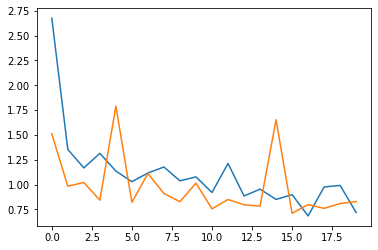

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

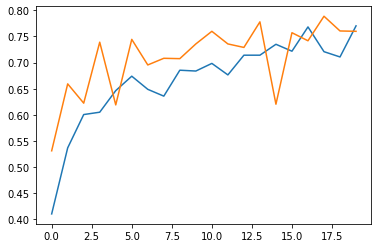

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [27]:
model.save("classifier_model.h5")